<a href="https://colab.research.google.com/github/egecandrsn/Car_resale_data-2023/blob/main/Car_Resale_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.f' % x)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [165]:
#Let's import data from github. I uploaded to github for ease of use with colab. Thanks to: https://www.kaggle.com/rahulmenon1758

data=pd.read_csv("https://raw.githubusercontent.com/egecandrsn/Car_resale_data-2023/main/car_resale_prices.csv",index_col=0)

In [166]:
data.head()

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5,21.4 kmpl,Hatchback,Agra
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7,17.6 kmpl,MUV,Agra
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5,19.81 kmpl,Hatchback,Agra


In [167]:
#Wow! Lots of object values. Let's clean.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17446 non-null  object 
 1   resale_price       17446 non-null  object 
 2   registered_year    17377 non-null  object 
 3   engine_capacity    17432 non-null  object 
 4   insurance          17439 non-null  object 
 5   transmission_type  17446 non-null  object 
 6   kms_driven         17443 non-null  object 
 7   owner_type         17401 non-null  object 
 8   fuel_type          17446 non-null  object 
 9   max_power          17344 non-null  object 
 10  seats              17436 non-null  float64
 11  mileage            16938 non-null  object 
 12  body_type          17446 non-null  object 
 13  city               17446 non-null  object 
dtypes: float64(1), object(13)
memory usage: 2.0+ MB


In [168]:
#Get unique values

for i in data.columns:
  print(i)
  print(data[i].unique())
  print(70*"-")

full_name
['2017 Maruti Baleno 1.2 Alpha' '2018 Tata Hexa XTA'
 '2015 Maruti Swift Dzire VXI' ... '2016 Toyota Camry 2.5 Hybrid'
 '2016 Toyota Corolla Altis GL MT' '2017 Maruti Swift Dzire VDi']
----------------------------------------------------------------------
resale_price
['₹ 5.45 Lakh' '₹ 10 Lakh' '₹ 4.50 Lakh' ... '₹ 62.90 Lakh' '₹ 26.89 Lakh'
 '₹ 11.29 Lakh']
----------------------------------------------------------------------
registered_year
['2017' '2018' '2015' '2009' '2010' '2016' '2014' '2020' '2021' '2019'
 '2011' '2012' '2013' '2022' '2004' 'Jul 2021' 'Dec 2018' 'Jun 2018'
 'Mar 2016' 'Feb 2018' 'Oct 2014' 'Mar 2014' 'Feb 2013' nan 'Aug 2018'
 'Jun 2019' 'Dec 2021' 'Apr 2019' 'May 2018' 'Nov 2013' 'Sept 2022'
 'Jan 2021' 'Sept 2020' 'Jan 2015' 'Oct 2017' 'Sept 2019' 'Jul 2019'
 'Mar 2020' 'Jan 2018' 'Nov 2015' 'May 2015' 'Dec 2014' 'Feb 2019'
 'May 2016' 'Apr 2018' 'May 2021' '2008' 'Mar 2022' 'Jun 2016' 'Jul 2020'
 'Jun 2017' 'Jul 2016' 'Jun 2015' 'Sept 2018' 'Nov 20

###Here are checklist for data cleaning part:



---


* Remove '₹' and 'Lakh' from resele_price column and turn values to us dollar for

* Firstly, just leave as it is, years from full_name. Maybe we can compare with actual years.

* Remove '₹' and 'Lakh' from resale_price column and turn values to us dollar for convenience.

* Get rid of month values, just use years from registered_year.

* Turn engine_capacity to int values by removing cc.

* Making Third Party and Third Party Insurance values equal to each other. And if nan or junk turn them to 0.

* Turn transmission_type to dummy variables.

* We need to turn kms_driven to int values and maybe can normalize.

* max_power columns is a mess, let's just get rid of it.

* We can take a quick look for seats column for nan and outliers. I know India is crowded place but more than 5 seats is unexpected.

* Turn object values to int for mileage column.

* We should get rid of body_type column if brand names are common in rows.

* City is looks good.

##Let's dive in.


---



In [169]:
#Remove '₹' and 'Lakh' from resale_price column and turn values to us dollar for convenience.
#For up-to-date data, let's use api to convert currency

import requests

def convert_lakh_to_usd(price):
    url = 'https://api.exchangerate-api.com/v4/latest/INR'
    response = requests.get(url)
    data = response.json()
    exchange_rate = data['rates']['USD']

    converted_prices = []

    for row in price:
        if 'Lakh' in row:
            row = row.replace("₹", "").replace("Lakh", "").replace(",", "").strip()
            converted_prices.append(float(row) * exchange_rate * 100000)
        elif 'Crore' in row:
            row = row.replace("₹", "").replace("Crore", "").replace(",", "").strip()
            converted_prices.append(float(row) * exchange_rate * 10000000)
        else:
            row = row.replace("₹", "").replace(",", "").strip()
            converted_prices.append(float(row) * exchange_rate)

    return converted_prices

data['resale_price'] = convert_lakh_to_usd(data['resale_price'])

In [170]:
#Get rid of month values, just use years from registered_year.
#There is '' empty strings, turn them to np.nan

import re
import numpy as np
data["registered_year"] = data["registered_year"].apply(lambda x: re.sub(r'\D+', '', str(x)))
data["registered_year"] = data["registered_year"].replace('', np.nan)

In [171]:
#Turn engine_capacity to int values by removing cc. Just copy the cell below.

import re
import numpy as np
data['engine_capacity'] = data['engine_capacity'].apply(lambda x: re.sub(r'\D+', '', str(x)))
data['engine_capacity'] = data['engine_capacity'].replace('', np.nan)

In [172]:
#Making Third Party and Third Party Insurance values equal to each other. And if nan or junk turn them to 0.

import numpy as np
data["insurance"]=data["insurance"].str.replace('Third Party insurance','Third Party').replace('Not Available',np.nan).replace('nan',np.nan).replace('2',np.nan).replace('1',np.nan)
data["insurance"].fillna(0, inplace=True)

In [173]:
#Turn transmission_type to dummy variables.

data=pd.get_dummies(data, columns=["transmission_type"])

In [174]:
#We need to turn kms_driven to int values and maybe can normalize later.

data["kms_driven"] = data["kms_driven"].apply(lambda x: re.sub(r'\D+', '', str(x)))
data["kms_driven"] = data["kms_driven"].replace('', np.nan)

In [175]:
#max_power columns is a mess, did you notice there are both bhp, rpm and kw values. There are some options:
#1. We can write a perfect regex function
#2. We can clean it with the help of llm api call
#3. We can just leave numbers and then clean from outliers but this is loosing a lot of data
#4. We can delete the column. Let's do this.

data=data.drop(["max_power"], axis=1)

Data shape: (17446, 14)
Seats Column NaN Count: 10


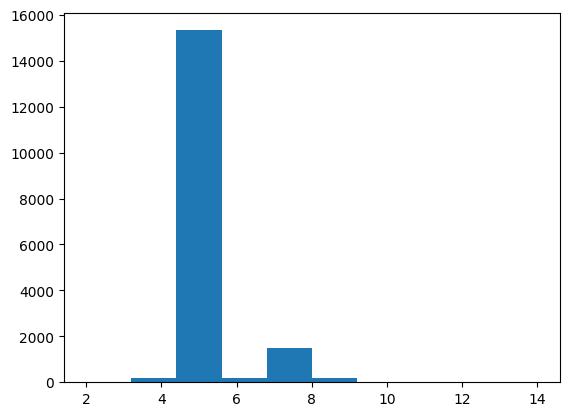

In [176]:
#We can take a quick look for seats column for nan and outliers.

import matplotlib.pyplot as plt
plt.hist(data.seats)
print(f"Data shape: {data.shape}")
print(f"Seats Column NaN Count: {data.seats.isna().sum()}")

In [177]:
#Turn object values to int for mileage column.

data["mileage"] = data["mileage"].apply(lambda x: re.sub(r'\D+', '', str(x)))
data["mileage"] = data["mileage"].replace('', np.nan)

In [178]:
#We should get rid of body_type column if brand names are common in rows.

data["body_type"].value_counts()

Hatchback        7343
Sedan            4781
SUV              4406
MUV               759
Minivans           65
Maruti             19
Pickup             13
Coupe              10
Cars                8
Tata                7
Mercedes-Benz       6
Mahindra            4
Chevrolet           3
Jaguar              3
Wagon               3
BMW                 2
Toyota              2
Datsun              2
Honda               2
Convertibles        2
Audi                1
Porsche             1
Volvo               1
Hyundai             1
Skoda               1
Isuzu               1
Name: body_type, dtype: int64

In [179]:
#Wonderful! We can keep first 4 values.

import numpy as np
data["body_type"]=data["body_type"].replace(['Minivans', 'Toyota', 'Coupe',
       'Chevrolet', 'Mercedes-Benz', 'Audi', 'Maruti', 'Pickup',
       'Porsche', 'Tata', 'Mahindra', 'Volvo', 'Jaguar', 'BMW', 'Cars',
       'Datsun', 'Hyundai', 'Honda', 'Convertibles', 'Wagon', 'Skoda',
       'Isuzu'], np.nan)

In [180]:
# Drop NaN and convert objects to int or float

data=data.dropna()
data["resale_price"]=data["resale_price"].astype(int)
data["registered_year"]=data["registered_year"].astype(int)
data["engine_capacity"]=data["engine_capacity"].astype(int)
data["kms_driven"]=data["kms_driven"].astype(int)
data["seats"]=data["seats"].astype(int)
data["mileage"]=data["mileage"].astype(int)
data["transmission_type_Automatic"]=data["transmission_type_Automatic"].astype(int)
data["transmission_type_Manual"]=data["transmission_type_Manual"].astype(int)

<ipython-input-180-0d6aa58cbf61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["resale_price"]=data["resale_price"].astype(int)
<ipython-input-180-0d6aa58cbf61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["registered_year"]=data["registered_year"].astype(int)
<ipython-input-180-0d6aa58cbf61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [181]:
import numpy as np
from scipy import stats

int_columns = data.select_dtypes(include=np.int64)

# Calculate the z-scores for each value in the DataFrame.
z_scores = np.abs(stats.zscore(int_columns))

# Remove rows where any column has a z-score greater than a threshold
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]

In [182]:
#Look at data, how beautiful is...

data.describe()

,resale_price,registered_year,engine_capacity,kms_driven,seats,mileage,transmission_type_Automatic,transmission_type_Manual
count,15851,15851,15851,15851,15851,15851,15851,15851
mean,8502,2016,1360,58141,5,993,0,1
std,6648,3,364,31789,1,963,0,0
min,336,2006,72,300,4,8,0,0
25%,4440,2014,1197,33240,5,178,0,0
50%,6720,2017,1199,55262,5,243,0,1
75%,9930,2019,1497,79344,5,1989,1,1
max,45300,2023,2755,246749,7,3405,1,1


In [183]:
# All clean! How much is loss?

first_data_shape=pd.read_csv("https://raw.githubusercontent.com/egecandrsn/Car_resale_data-2023/main/car_resale_prices.csv",index_col=0).shape
print(f"Shape of data was {first_data_shape}")
print(f"Number of total loss data: {first_data_shape[0]-data.shape[0]}")

Shape of data was (17446, 14)
Number of total loss data: 1595


#Read for getting know the data? I prepared some questions:

In [184]:
#What is the average resale price of the vehicles in this dataset?

data["resale_price"].mean()

8502.001451012555

In [185]:
#Which vehicle has the highest resale price?

data[data["resale_price"]==(data["resale_price"].max())]

,full_name,resale_price,registered_year,engine_capacity,insurance,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,transmission_type_Automatic,transmission_type_Manual
788,2018 Mercedes-Benz E-Class Expression E 220d,45300,2018,1950,Third Party,54000,Second Owner,Diesel,5,161,Sedan,Delhi,1,0
17005,2019 Jaguar XE 2.0L Diesel Portfolio,45300,2019,1999,Comprehensive,11000,Second Owner,Diesel,5,135,Sedan,Bangalore,1,0


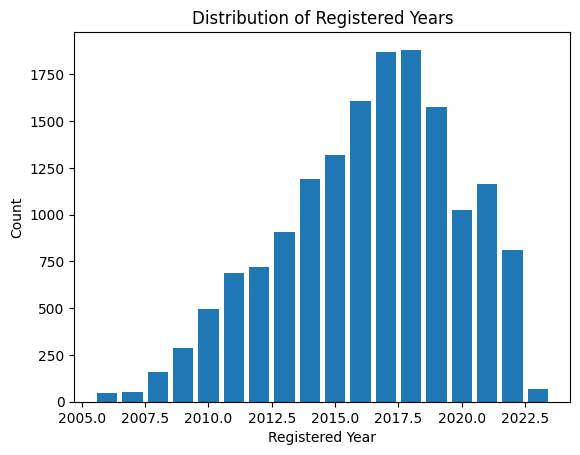

In [186]:
#What is the distribution of values in the "registered_year" column of the dataset?

import matplotlib.pyplot as plt

plt.bar(data["registered_year"].value_counts().index, data["registered_year"].value_counts())
plt.xlabel("Registered Year")
plt.ylabel("Count")
plt.title("Distribution of Registered Years")
plt.show()

In [187]:
#Which vehicle has the lowest engine capacity?

data[data["engine_capacity"]==(data["engine_capacity"].min())].head()

,full_name,resale_price,registered_year,engine_capacity,insurance,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,transmission_type_Automatic,transmission_type_Manual
10558,2017 Mahindra e2o Plus P8,5520,2017,72,Third Party,20000,Second Owner,Electric,4,140,Hatchback,Bangalore,1,0
14181,2017 Mahindra e2o Plus P8,6600,2017,72,Third Party,10000,First Owner,Electric,4,140,Hatchback,Delhi,1,0
14193,2017 Mahindra e2o Plus P8,6600,2017,72,Third Party,10000,First Owner,Electric,4,140,Hatchback,Delhi,1,0


In [188]:
#How different is the registered_year from full_name's year value?

(data['full_name'].str.extract(r'(\d{4})').astype(int) == data["registered_year"]).isna().sum().sum()

0

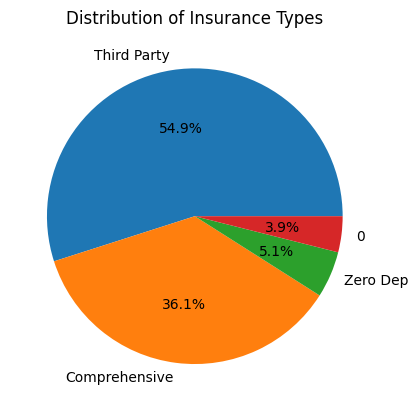

In [189]:
#What is the most common type of insurance in the dataset?

import matplotlib.pyplot as plt

plt.pie(data['insurance'].value_counts(), labels=data['insurance'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Insurance Types')
plt.show()

In [190]:
#How many vehicles have had multiple owners?

data["owner_type"].value_counts().tail(len(data["owner_type"].value_counts())-1).sum()

4657

In [191]:
#Which fuel type is more prevalent?

data["fuel_type"].value_counts()

Petrol      10760
Diesel       4631
CNG           433
LPG            24
Electric        3
Name: fuel_type, dtype: int64

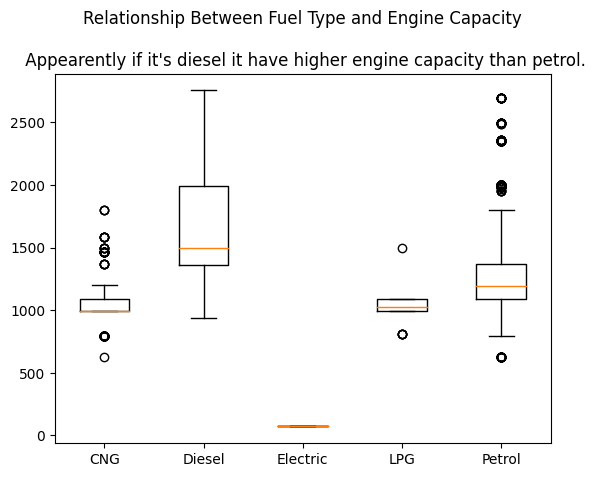

In [192]:
#Is there a relationship between fuel_type and engine_capacity?


import matplotlib.pyplot as plt
fuel_groups = data.groupby('fuel_type')['engine_capacity'].apply(list)
plt.boxplot(fuel_groups.values, labels=fuel_groups.index)
plt.title("Relationship Between Fuel Type and Engine Capacity\n\n Appearently if it's diesel it have higher engine capacity than petrol.")
plt.show()

In [193]:
#How many seats do most vehicles have on average? How is the difference varies by body_type?

average_seats_by_body_type = data.groupby('body_type')['seats'].mean()
most_seats_body_type = average_seats_by_body_type.idxmax()
most_seats_average = average_seats_by_body_type.max()
print(f"{most_seats_body_type} have most seats, average is {most_seats_average}")
least_seats_body_type = average_seats_by_body_type.idxmin()
least_seats_average = average_seats_by_body_type.min()
print(f"{least_seats_body_type} have least seats, average is {least_seats_average}")

MUV have most seats, average is 6.913398692810458
Hatchback have least seats, average is 4.992491657397108


In [194]:
#How is the general difference between vehicles varies by city?

pd.set_option('display.max_columns', None)
data.groupby('city').describe()

resale_price                                      registered_year  \
                  count mean  std  min  25%  50%   75%   max           count   
city                                                                           
Agra                191 5916 4313  600 2940 4800  7800 30000             191   
Ahmedabad          1232 8040 5508  360 4560 6720  9900 44100            1232   
Bangalore          2135 9450 6661  600 5448 7800 10884 45300            2135   
Chandigarh          404 7105 5033  960 4152 6000  8562 42000             404   
Chennai            1211 8819 6509 1200 4986 7140  9996 45000            1211   
Delhi              2683 8761 7445  588 4200 6540 10020 45300            2683   
Gurgaon             970 7404 6264  388 3606 5760  8511 41700             970   
Hyderabad          1474 8825 6296  600 4800 7200 10560 43200            1474   
Jaipur              818 7686 6025  660 3993 6108  9300 44100             818   
Kolkata            1066 7894 6900  336 3600 5688  9480 44400            1066   
Lucknow             519 6573 4240  720 4122 6048  7896 39000             519   
Mumbai             1847 9837 7670  720 5052 7607 11406 45000            1847   
Pune               1301 7704 6022  768 3959 6000  9264 45000            1301   

                                             engine_capacity               \
           mean std  min  25%  50%  75%  max           count mean std min   
city                                                                        
Agra       2015   4 2009 2012 2015 2019 2022             191 1314 345 796   
Ahmedabad  2017   4 2006 2014 2017 2019 2023            1232 1326 333 624   
Bangalore  2016   3 2006 2014 2017 2019 2023            2135 1356 357  72   
Chandigarh 2017   4 2006 2014 2017 2019 2022             404 1323 345 796   
Chennai    2017   3 2006 2015 2017 2019 2023            1211 1319 335 624   
Delhi      2016   3 2006 2014 2017 2019 2023            2683 1386 394  72   
Gurgaon    2016   4 2007 2014 2017 2019 2023             970 1337 354 624   
Hyderabad  2017   4 2006 2014 2017 2019 2023            1474 1345 347 796   
Jaipur     2016   4 2006 2014 2017 2019 2023             818 1350 370 624   
Kolkata    2016   4 2006 2014 2017 2019 2023            1066 1371 370 624   
Lucknow    2017   3 2006 2015 2017 2019 2023             519 1301 333 624   
Mumbai     2016   3 2006 2014 2017 2018 2023            1847 1445 387 624   
Pune       2016   4 2006 2013 2016 2018 2023            1301 1330 349 624   

                               kms_driven                                \
            25%  50%  75%  max      count  mean   std   min   25%   50%   
city                                                                      
Agra       1120 1199 1462 2499        191 73665 39259 10000 40000 70000   
Ahmedabad  1197 1199 1497 2755       1232 61160 31682  2464 35836 60000   
Bangalore  1197 1199 1497 2755       2135 54906 30525   940 31527 51338   
Chandigarh 1197 1199 1497 2755        404 63627 37671   821 33436 60000   
Chennai    1197 1199 1497 2755       1211 57792 32366   780 31833 55450   
Delhi      1197 1199 1498 2755       2683 56104 29127   500 34867 54683   
Gurgaon    1197 1198 1497 2755        970 62969 33487  3256 38483 60000   
Hyderabad  1197 1199 1497 2755       1474 63756 32698  1457 39121 60888   
Jaipur     1197 1248 1497 2755        818 69449 35015   386 42050 70000   
Kolkata    1197 1199 1498 2755       1066 45952 26577   300 28000 42344   
Lucknow    1197 1199 1462 2755        519 63541 33629   789 39091 60000   
Mumbai     1197 1373 1591 2755       1847 53160 29877   990 30000 50000   
Pune       1197 1198 1497 2755       1301 58967 30883  2728 35342 58000   

                         seats                              mileage            \
              75%    max count mean std min 25% 50% 75% max   count mean  std   
city                                                                            
Agra       100000 150000   191    5   1   4   5   5  

In [195]:
#What is the distribution of transmission types (Automatic and Manual) in the dataset?

print(f"Automatic type is % {data.transmission_type_Automatic.sum()/len(data)*100}")
print(f"Manual type is % {data.transmission_type_Manual.sum()/len(data)*100}")

Automatic type is % 25.108825941580974
Manual type is % 74.89117405841903


In [196]:
#What is the average resale price for each fuel type?

resale_fuel=data.groupby("fuel_type")["resale_price"].apply(list)
print(f'Average Resale Price for CNG: {np.mean(resale_fuel["CNG"]):.0f}')
print(f'Average Resale Price for Diesel: {np.mean(resale_fuel["Diesel"]):.0f}')
print(f'Average Resale Price for LPG: {np.mean(resale_fuel["LPG"]):.0f}')
print(f'Average Resale Price for Petrol: {np.mean(resale_fuel["Petrol"]):.0f}')

Average Resale Price for CNG: 5643
Average Resale Price for Diesel: 11644
Average Resale Price for LPG: 2493
Average Resale Price for Petrol: 7279


In [197]:
#Which city has the highest average mileage for cars registered in 2020?

mileage_city=data[data["registered_year"]==2020].groupby("city")["mileage"].mean()
arg_max=mileage_city.argmax()
mileage_city.index[arg_max]

'Lucknow'

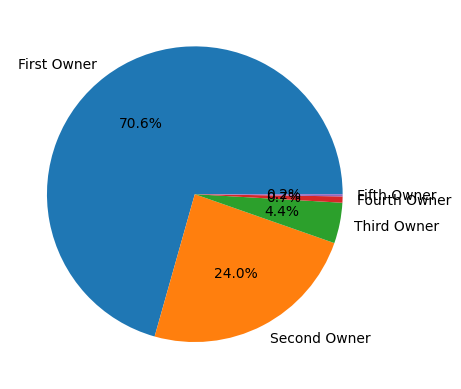

First Owner     11194
Second Owner     3807
Third Owner       704
Fourth Owner      108
Fifth Owner        38
Name: owner_type, dtype: int64


In [198]:
#What is the total number of cars for each owner type?

values=data["owner_type"].value_counts().values
labels=data["owner_type"].value_counts().index
plt.pie(values,labels=labels,autopct='%1.1f%%',labeldistance=1.1)
plt.show()
print(data["owner_type"].value_counts())

In [199]:
#Which year had the highest total resale price for cars with automatic transmission?

year_auto_sale=data[data["transmission_type_Automatic"]==1].groupby("registered_year")["resale_price"].sum()
year_auto_sale_argmax=year_auto_sale.argmax()
year_auto_sale.index[year_auto_sale_argmax]

2018

In [200]:
#What is the average engine capacity for cars in each body type category?

data.groupby("body_type")["engine_capacity"].mean()

body_type
Hatchback   1122
MUV         1712
SUV         1604
Sedan       1497
Name: engine_capacity, dtype: float64

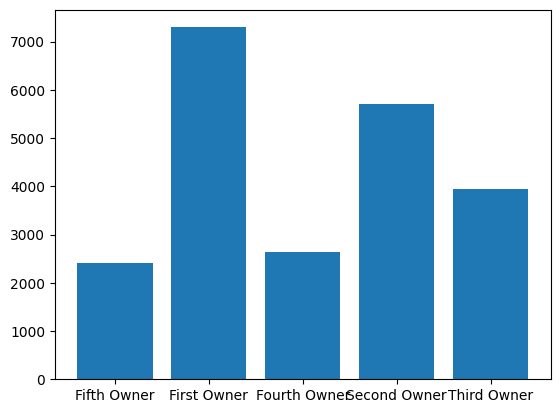

In [201]:
#Which owner type has the highest median resale price?

own_price_val=data.groupby("owner_type")["resale_price"].median().values
own_price_index=data.groupby("owner_type")["resale_price"].median().index
plt.bar(own_price_index,own_price_val)
plt.show()

In [202]:
#What is the median resale price for cars with manual transmission in each city?

data[data["transmission_type_Manual"]==1].groupby("city")["resale_price"].median()

city
Agra         4560
Ahmedabad    5976
Bangalore    7020
Chandigarh   5454
Chennai      6300
Delhi        5700
Gurgaon      4919
Hyderabad    6516
Jaipur       5760
Kolkata      4926
Lucknow      6000
Mumbai       6036
Pune         5376
Name: resale_price, dtype: float64

In [203]:
#Which combination of city and fuel type has the highest average resale price?

city_fuel_price=data.groupby(["city","fuel_type"])["resale_price"].mean()
city_fuel_price_argmax=city_fuel_price.argmax()
city_fuel_price.index[city_fuel_price_argmax]

('Mumbai', 'Diesel')

In [204]:
#What are the most common fuel type and body type categories for vehicles with each transmission type, and how many vehicles fall into this category?

manuel_body_fuel=data[data["transmission_type_Manual"]==1].groupby(["fuel_type","body_type"])["resale_price"].count()
auto_body_fuel=data[data["transmission_type_Manual"]==0].groupby(["fuel_type","body_type"])["resale_price"].count()
print(f"Manual transmission= Category: {manuel_body_fuel.index[manuel_body_fuel.argmax()]} | Number:{manuel_body_fuel.max()}")
print(f"Automatic transmission= Category: {auto_body_fuel.index[auto_body_fuel.argmax()]} | Number:{auto_body_fuel.max()}")

Manual transmission= Category: ('Petrol', 'Hatchback') | Number:4973
Automatic transmission= Category: ('Petrol', 'Hatchback') | Number:1002


In [205]:
#Save cleaned data as csv
data.to_csv("cleaned.csv")

#####Let's move on next notebook, Visualization!